In [60]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils  

In [61]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [62]:
# Filter the dataset to include only digits 4 and 9
desired_digits = [4, 9]
train_filter = np.isin(y_train, desired_digits)
test_filter = np.isin(y_test, desired_digits)

X_train = X_train[train_filter]
y_train = y_train[train_filter]
X_test = X_test[test_filter]
y_test = y_test[test_filter]

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [63]:
file_path = 'C:/Users/pc/Documents/train.csv'
test_data = pd.read_csv(file_path, delimiter=',', header=0, usecols=[x for x in range(0, 784)])

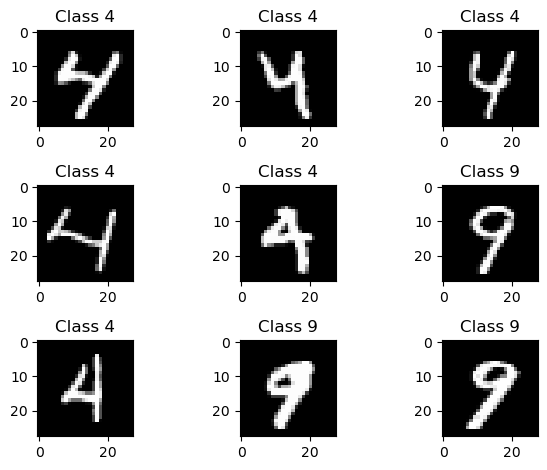

In [64]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [65]:
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (11791, 784)
Testing matrix shape (1991, 784)


In [66]:
y_train = np.where(y_train == 9, 1, 0)
y_test = np.where(y_test == 9, 1, 0)

In [67]:
model = Sequential()
model.add(Dense(512, input_shape=(784,))) 
model.add(Activation('relu'))
model.add(Dense(1))  # Single output neuron for binary classification
model.add(Activation('sigmoid'))  # Sigmoid activation for binary classification

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train,
          batch_size=128, epochs=10,
          verbose=1,validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 activation_16 (Activation)  (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
 activation_17 (Activation)  (None, 1)                 0         
                                                                 
Total params: 402,433
Trainable params: 402,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
74/74 [==============================] - 1s 5ms/step - loss: 0.1709 - accuracy: 0.9379 - val_loss: 0.0770 - val_accuracy: 0.9746
Epoch 2/10
74/74 [======================

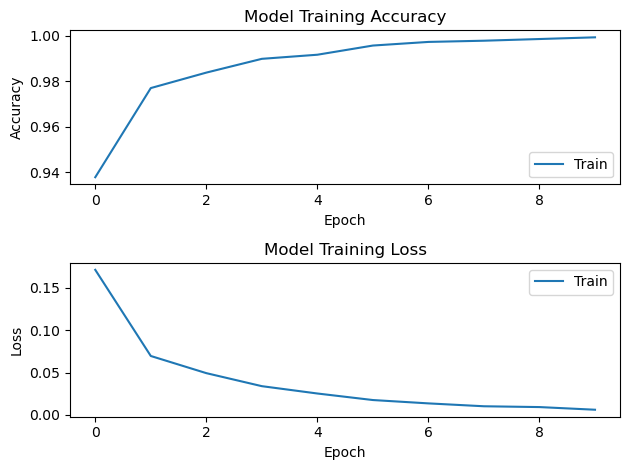

In [68]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')  # Updated title
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')  # Updated legend label

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('Model Training Loss')  # Updated title
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')  # Updated legend label

plt.tight_layout()
plt.show()

In [69]:
results = model.predict(test_data)

1313/1313 [==============================] - 1s 701us/step


In [70]:
# Assuming you've already prepared and trained your model
# Ensure that your model is correctly configured for binary classification

# Make predictions on the test data
results = model.predict(X_test)

# Convert the probabilities to class labels (0 or 1)
predicted_classes = (results > 0.5).astype('int32')

# Generate the 'ImageId' column as a sequence
image_ids = pd.Series(range(1, len(predicted_classes) + 1), name="ImageId")

# Create a Pandas Series for the predicted labels
results = pd.Series(predicted_classes.flatten(), name="Label")

# Concatenate the 'ImageId' and 'Label' columns
submission = pd.concat([image_ids, results], axis=1)

# Save the submission to a CSV file
submission.to_csv("submission2.csv", index=False)


63/63 [==============================] - 0s 710us/step


In [71]:
submission

,ImageId,Label
0,1,0
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1986,1987,0
1987,1988,0
1988,1989,0
1989,1990,1


In [72]:
class_probabilities = model.predict(X_test)

# Determine the predicted classes based on the highest probability
predicted_classes = np.argmax(class_probabilities, axis=1)

# Now you can continue with your evaluation
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

63/63 [==============================] - 0s 710us/step


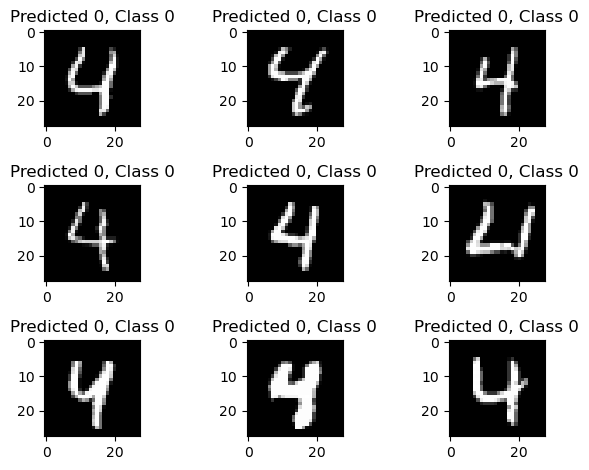

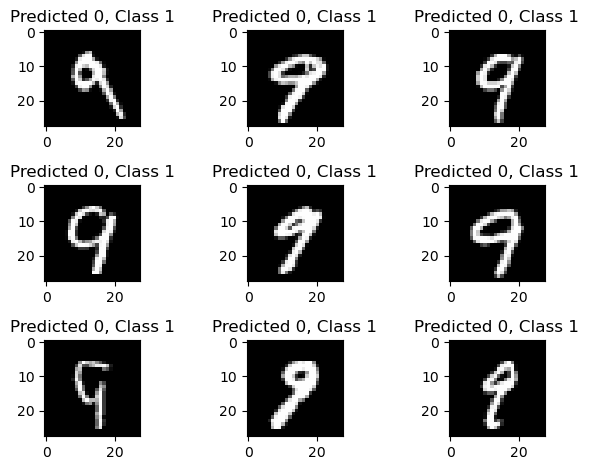

In [73]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

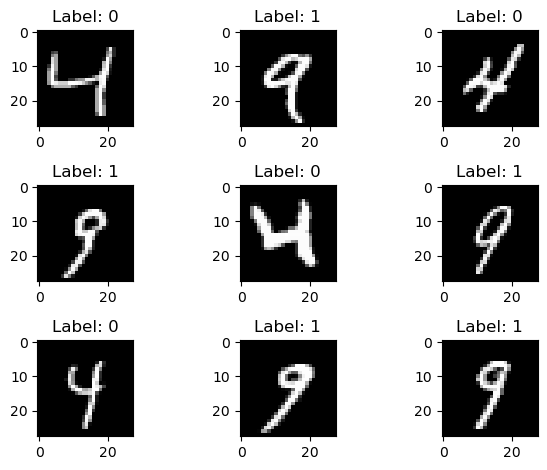

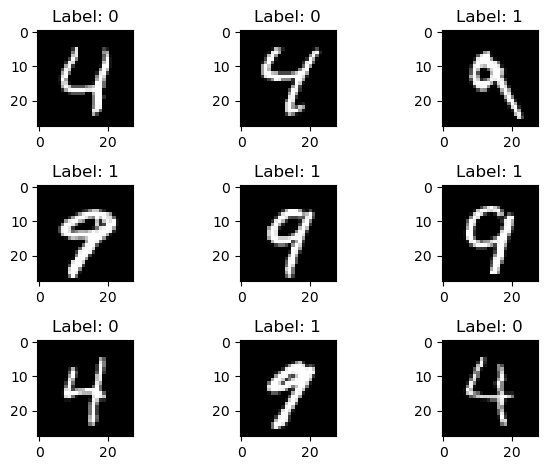

In [74]:
# Visualize a sample of training data
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title("Label: {}".format(y_train[i]))
plt.tight_layout()
plt.show()

# Visualize a sample of testing data
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Label: {}".format(y_test[i]))
plt.tight_layout()
plt.show()


In [75]:
# Make predictions
class_probabilities = model.predict(X_test)
predicted_classes = (class_probabilities > 0.5).astype('int32')

# Debugging statements
print("Class Probabilities:")
print(class_probabilities[:10])  # Print the first 10 predictions
print("Predicted Classes:")
print(predicted_classes[:10])   # Print the first 10 predicted classes
print("True Classes:")
print(y_test[:10])              # Print the first 10 true classes

63/63 [==============================] - 0s 694us/step
Class Probabilities:
[[3.3451840e-03]
 [1.1240821e-03]
 [9.9995834e-01]
 [9.9859720e-01]
 [9.9990660e-01]
 [9.9979228e-01]
 [1.7452441e-05]
 [9.9965942e-01]
 [1.7908802e-03]
 [1.1440355e-05]]
Predicted Classes:
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]
True Classes:
[0 0 1 1 1 1 0 1 0 0]
